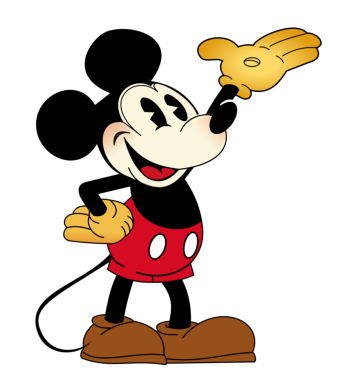

(1200, 1347)

In [1349]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import numpy as np
import string

# Load the image
image_path = "images/topolino.png"  # Replace with your image path
image = Image.open(image_path)

# Display the image
plt.imshow(image)
plt.axis("off")  # Turn off axes for better visualization
plt.show()

image.size

(256, 256, 4)

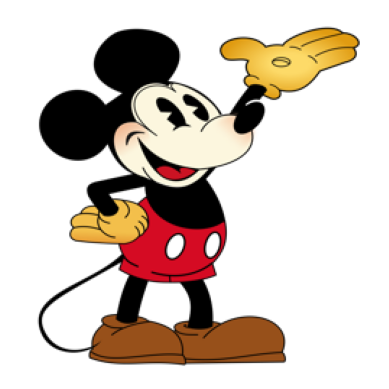

In [1350]:
gray_image = image.convert("RGBA").resize((256, 256))

array = np.array(gray_image)

gray_image = Image.fromarray(array)

plt.imshow(gray_image)
plt.axis("off")  # Turn off axes for better visualization
plt.show

array.shape

In [268]:
gray_image.show()

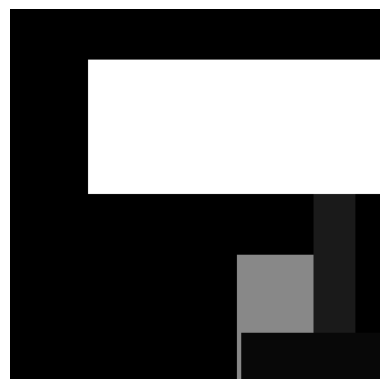

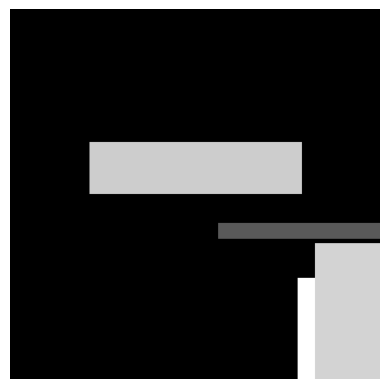

(256, 256)

In [299]:
import random
new_image = Image.new("L", (256, 256))

draw = ImageDraw.Draw(new_image)

for _ in range(4):
    x, y = random.randint(0, 255), random.randint(0, 255)
    rect_width, rect_height = random.randint(1, 255), random.randint(1, 255) 
    color = (random.randint(0,255))

    
    draw.rectangle([(x, y), (x+rect_width, y+rect_height)], fill=color)  
    
new_image2 = Image.new("L", (256, 256))

draw2 = ImageDraw.Draw(new_image2)  
for _ in range(4):
    x, y = random.randint(0, 255), random.randint(0, 255)
    rect_width, rect_height = random.randint(1, 255), random.randint(1, 255) 
    color = (random.randint(0,255))

    
    draw2.rectangle([(x, y), (x+rect_width, y+rect_height)], fill=color)  

plt.imshow(new_image, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

plt.imshow(new_image2, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

blended_image = np.array(Image.blend(new_image, new_image2, alpha=0.1))

'''
plt.imshow(blended_image, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()
'''
blended_image.shape


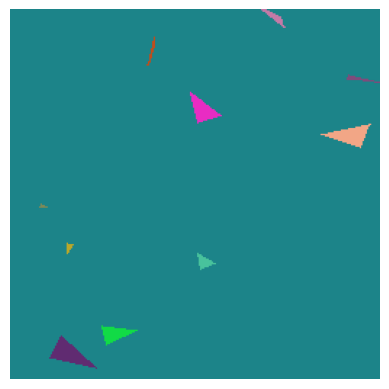

In [1467]:
# Create population 
import random

def random_color2():
    return random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)

def add_triangle(image, target_height, target_width):
    region = random.randint(10, 22)
    region_x = random.randint(0, target_width-1)
    region_y = random.randint(0, target_height-1)

    vertices = []
    for i in range(3):
        vertices.append((random.randint(region_x - region, region_x + region),
                    random.randint(region_y - region, region_y + region)))
        
    image.polygon(vertices, fill=random_color2())

new_image = Image.new("RGBA", (255, 255), color=random_color2())
img = ImageDraw.Draw(new_image)
n_shapes = random.randint(10, 10)

for i in range(n_shapes):
    add_triangle(img, 256, 256)
    

plt.imshow(new_image, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()
    
    

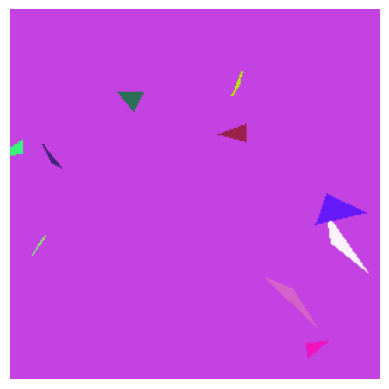

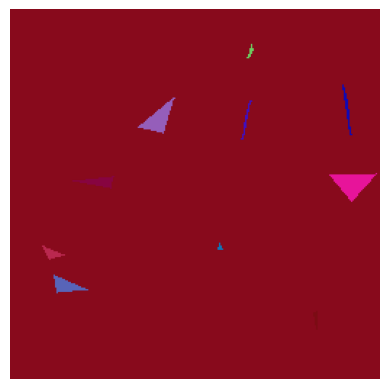

In [1489]:
#parents

parent1 = Image.new("RGBA", (255, 255), color=random_color2())
_1 = ImageDraw.Draw(parent1)
n_shapes = random.randint(10, 10)

for i in range(n_shapes):
    add_triangle(_1, 256, 256)
    
parent2 = Image.new("RGBA", (255, 255), color=random_color2())
_2 = ImageDraw.Draw(parent2)
n_shapes = random.randint(10, 10)

for i in range(n_shapes):
    add_triangle(_2, 256, 256)
    

plt.imshow(parent1, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

plt.imshow(parent2, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()


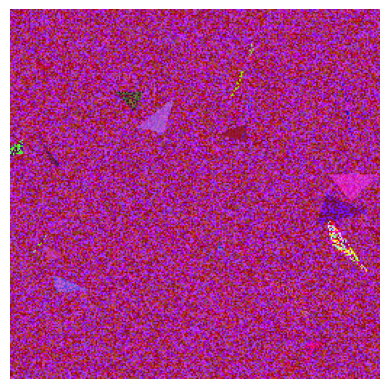

In [1490]:
def pixelwise_change(parent1, parent2):
    mask = np.random.choice([True, False], size=parent1.shape)
    child = np.where(mask, parent1, parent2)
    
    return child

child = pixelwise_change(np.array(parent1), np.array(parent2))
child = Image.fromarray(child)

plt.imshow(child, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()

0.4827055103327158


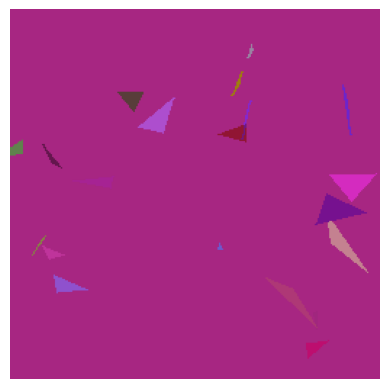

In [1492]:
def blending(ind1, ind2):
    alpha = random.random()
    print(alpha)
    return Image.blend(ind1, ind2, alpha=alpha)

child = blending(parent1, parent2)

plt.imshow(child, cmap="gray")
plt.axis("off")  # Turn off axes for better visualization
plt.show()


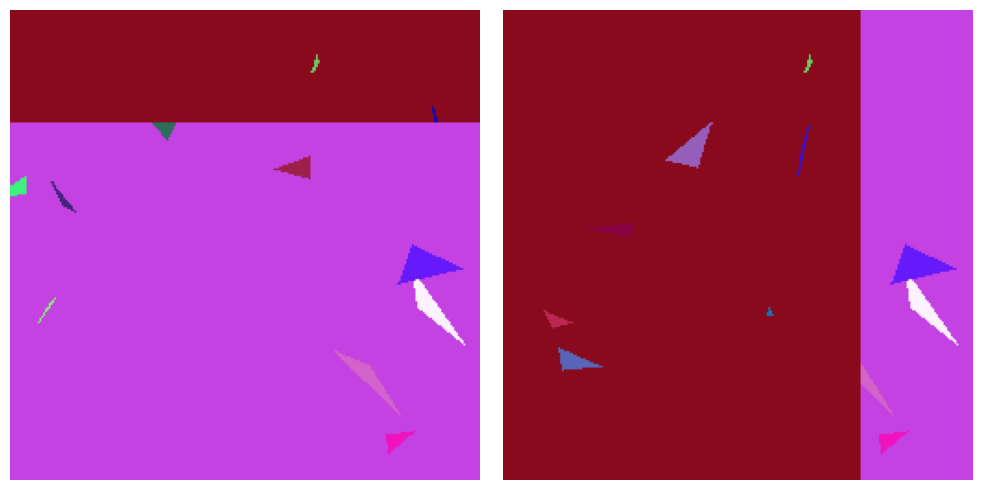

In [1511]:
def horizontal_swap(parent1, parent2):
    random_row = random.randint(0, parent1.shape[0]-1)
    parent1[0:random_row] = parent2[0:random_row]
    
    return parent1

def vertical_swap(parent1, parent2):
    random_col= random.randint(0, parent1.shape[1]-1)
    parent1[:, 0:random_col, :] = parent2[:, 0:random_col, :]
    
    return parent1


child = horizontal_swap(np.array(parent1), np.array(parent2))
child = Image.fromarray(child)

child2 = vertical_swap(np.array(parent1), np.array(parent2))
child2 = Image.fromarray(child2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the first image in the first subplot
axes[0].imshow(child, cmap="gray")
axes[0].axis("off")  # Turn off axes  # Optional: Add a title

# Display the second image in the second subplot
axes[1].imshow(child2, cmap="gray")
axes[1].axis("off")  # Turn off axes  # Optional: Add a title

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


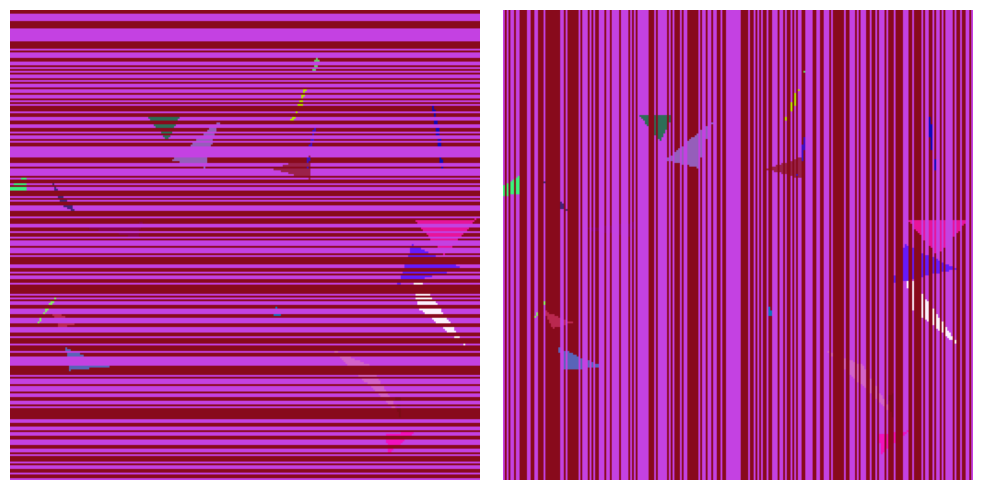

In [1514]:
def random_horizontal_swap(parent1, parent2):
    """Swap random columns of two images."""
    random_rows= np.random.choice(parent1.shape[0], 
                                              int(parent1.shape[0]/2), 
                                              replace=False)
    parent1[random_rows] = parent2[random_rows]
    
    return parent1

def random_vertical_swap(parent1, parent2):
    """Swap random columns of two images."""
    random_cols= np.random.choice(parent1.shape[0], 
                                              int(parent1.shape[0]/2), 
                                              replace=False)
    parent1[:, random_cols, :] = parent2[:, random_cols, :]
    
    return parent1

child = random_horizontal_swap(np.array(parent1), np.array(parent2))
child = Image.fromarray(child)

child2 = random_vertical_swap(np.array(parent1), np.array(parent2))
child2 = Image.fromarray(child2)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Display the first image in the first subplot
axes[0].imshow(child, cmap="gray")
axes[0].axis("off")  # Turn off axes

# Display the second image in the second subplot
axes[1].imshow(child2, cmap="gray")
axes[1].axis("off")  # Turn off axes

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [ ]:
individual = Image.new("RGBA", (255, 255), color=random_color2())
_ = ImageDraw.Draw(individual)
n_shapes = random.randint(10, 10)

for i in range(n_shapes):
    add_triangle(_1, 256, 256)

In [1420]:
import numpy as np
import random
import matplotlib.pyplot as plt
import os

def losses(file_path):
    loss = []
    with open(file_path, "r") as f:
        next(f)
        for line in f:
            _ = line.split("fitness :")[1]
            loss.append(float(_))
            
    return loss

In [1425]:
loss1 = losses("output/swap_only.txt")
loss2 = losses("output/blend_only.txt")
loss3 = losses("output/pixelwise_only.txt")


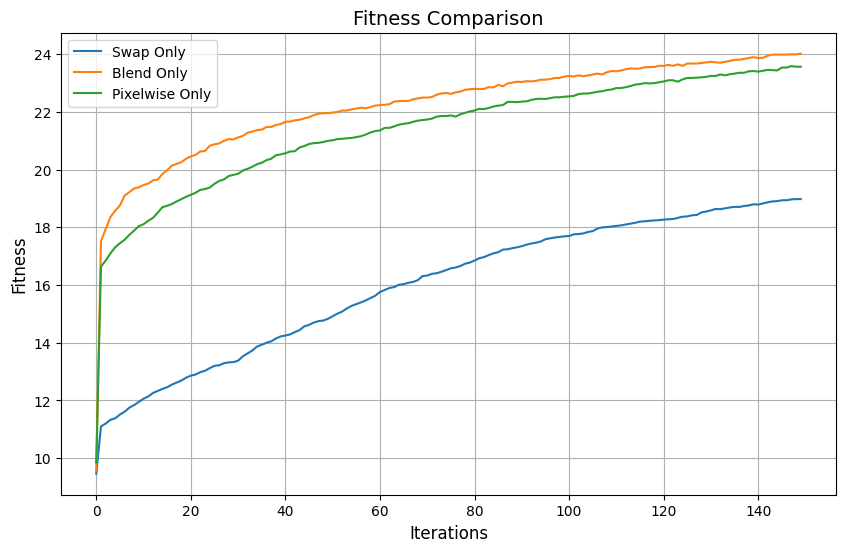

In [1428]:
generations = []
plt.figure(figsize=(10, 6))
plt.plot(loss1, label='Swap Only')
plt.plot(loss2, label='Blend Only')
plt.plot(loss3, label='Pixelwise Only')

# Add labels, legend, and title
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Fitness', fontsize=12)
plt.title('Fitness Comparison', fontsize=14)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()